In [ ]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Point

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Data_ Missing Migrants Project Data - Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16839 entries, 0 to 16838
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   web_id                    16839 non-null  object 
 1   region                    16839 non-null  object 
 2   reported_date             16824 non-null  object 
 3   number_dead               15939 non-null  float64
 4   number_missing            1651 non-null   float64
 5   total_dead_and_missing    16839 non-null  object 
 6   number_of_survivors       2636 non-null   float64
 7   number_of_female          4411 non-null   float64
 8   number_of_male            10840 non-null  float64
 9   number_of_children        3220 non-null   float64
 10  cause_death               16838 non-null  object 
 11  country_of_incident       16839 non-null  object 
 12  location_description      16839 non-null  object 
 13  unsd_geographic_grouping  16838 non-null  object 
 14  locati

In [ ]:
df.head()

,web_id,region,reported_date,number_dead,number_missing,total_dead_and_missing,number_of_survivors,number_of_female,number_of_male,number_of_children,cause_death,country_of_incident,location_description,unsd_geographic_grouping,location_coodinates,migration_route,information_source,url,source_quality
0,2014.MMP01037,North America,2014-12-31,1.0,NaN,1,NaN,NaN,1.0,NaN,Unknown (skeletal remains),United States of America,Pima Country Office of the Medical Examiner ju...,Northern America,"32.22804, -112.590416",US-Mexico border crossing,Pima County Office of the Medical Examiner (PC...,http://humaneborders.info/,5
1,2014.MMP01264,North America,2014-12-31,1.0,NaN,1,NaN,1.0,0.0,NaN,Environmental Exposure-Cold,United States of America,"Duval county, Texas, United States of America\n",Northern America,"27.63192, -98.77246",US-Mexico border crossing,Border Patrol Deaths FOIA (UBC),NaN,5
2,2014.MMP00259,South-eastern Asia,2014-12-31,NaN,750.0,750,NaN,NaN,NaN,250.0,"Mostly starvation, dehydration, and beatings b...",Myanmar,"Departed from Arakan, Myanmar. Vast majority g...",South-eastern Asia,"14.60759586, 93.21449103",NaN,UNHCR,http://bit.ly/1G6YUEZ,4
3,2014.MMP01263,North America,2014-12-30,1.0,NaN,1,NaN,0.0,0.0,NaN,Other,United States of America,"Pima county, Arizona, United States of America\n",Northern America,"32.1375, -112.68783",US-Mexico border crossing,Border Patrol Deaths FOIA (UBC),NaN,5
4,2014.MMP00258,Mediterranean,2014-12-30,4.0,NaN,4,NaN,NaN,NaN,NaN,Drowning,Tunisia,"Bodies recovered near Zarzia and Ben Gardane, ...",Uncategorized,"33.3482565, 11.109411",Central Mediterranean,IOM Tunisia,NaN,4


In [ ]:
sentinel_value = -1

In [ ]:
df.fillna(sentinel_value, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16839 entries, 0 to 16838
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   web_id                    16839 non-null  object 
 1   region                    16839 non-null  object 
 2   reported_date             16839 non-null  object 
 3   number_dead               16839 non-null  float64
 4   number_missing            16839 non-null  float64
 5   total_dead_and_missing    16839 non-null  object 
 6   number_of_survivors       16839 non-null  float64
 7   number_of_female          16839 non-null  float64
 8   number_of_male            16839 non-null  float64
 9   number_of_children        16839 non-null  float64
 10  cause_death               16839 non-null  object 
 11  country_of_incident       16839 non-null  object 
 12  location_description      16839 non-null  object 
 13  unsd_geographic_grouping  16839 non-null  object 
 14  locati

In [ ]:
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convert coordinates to geometric points
def convert_to_point(coord):
    try:
        lat, lon = map(float, coord.split(','))
        return Point(lon, lat)
    except:
        return None

df['geometry'] = df['location_coodinates'].apply(convert_to_point)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

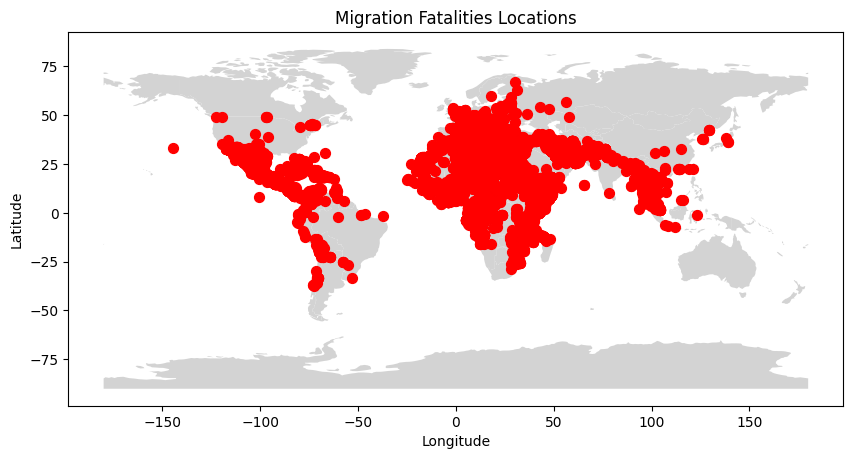

In [ ]:
world = gpd.read_file('/home/aman/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Plotting the geospatial data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, color='red', markersize=50)
plt.title("Migration Fatalities Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:

df['year'] = df['reported_date'].dt.year
df['month'] = df['reported_date'].dt.month
df['day_of_week'] = df['reported_date'].dt.dayofweek

In [ ]:
df.head()

,web_id,region,reported_date,number_dead,number_missing,total_dead_and_missing,number_of_survivors,number_of_female,number_of_male,number_of_children,...,unsd_geographic_grouping,location_coodinates,migration_route,information_source,url,source_quality,geometry,year,month,day_of_week
0,2014.MMP01037,North America,2014-12-31,1.0,-1.0,1,-1.0,-1.0,1.0,-1.0,...,Northern America,"32.22804, -112.590416",US-Mexico border crossing,Pima County Office of the Medical Examiner (PC...,http://humaneborders.info/,5,POINT (-112.590416 32.22804),2014.0,12.0,2.0
1,2014.MMP01264,North America,2014-12-31,1.0,-1.0,1,-1.0,1.0,0.0,-1.0,...,Northern America,"27.63192, -98.77246",US-Mexico border crossing,Border Patrol Deaths FOIA (UBC),-1,5,POINT (-98.77246 27.63192),2014.0,12.0,2.0
2,2014.MMP00259,South-eastern Asia,2014-12-31,-1.0,750.0,750,-1.0,-1.0,-1.0,250.0,...,South-eastern Asia,"14.60759586, 93.21449103",-1,UNHCR,http://bit.ly/1G6YUEZ,4,POINT (93.21449103 14.60759586),2014.0,12.0,2.0
3,2014.MMP01263,North America,2014-12-30,1.0,-1.0,1,-1.0,0.0,0.0,-1.0,...,Northern America,"32.1375, -112.68783",US-Mexico border crossing,Border Patrol Deaths FOIA (UBC),-1,5,POINT (-112.68783 32.1375),2014.0,12.0,1.0
4,2014.MMP00258,Mediterranean,2014-12-30,4.0,-1.0,4,-1.0,-1.0,-1.0,-1.0,...,Uncategorized,"33.3482565, 11.109411",Central Mediterranean,IOM Tunisia,-1,4,POINT (11.109411 33.3482565),2014.0,12.0,1.0


In [ ]:
df.replace(-1, np.nan, inplace=True)

# Drop rows where 'migration_route' is NaN
df = df.dropna(subset=['migration_route'])

# Count the occurrences of each migration route
migration_route_counts = df['migration_route'].value_counts().reset_index()
migration_route_counts.columns = ['migration_route', 'count']

# Select the top 10 migration routes
top_10_migration_routes = migration_route_counts.head(10)

# Display the top 10 migration routes
print(top_10_migration_routes)

                                     migration_route  count
0                          US-Mexico border crossing   4184
1                                Afghanistan to Iran   2922
2                             Sahara Desert crossing   2155
3                              Central Mediterranean   1524
4                              Western Mediterranean    714
5                         Eastern Route to/from EHOA    501
6                              Eastern Mediterranean    427
7  Western Africa / Atlantic route to the Canary ...    323
8                                    Western Balkans    238
9                                             Darien    214


/tmp/ipykernel_24353/542165864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_migration_routes, x='count', y='migration_route', palette='viridis')


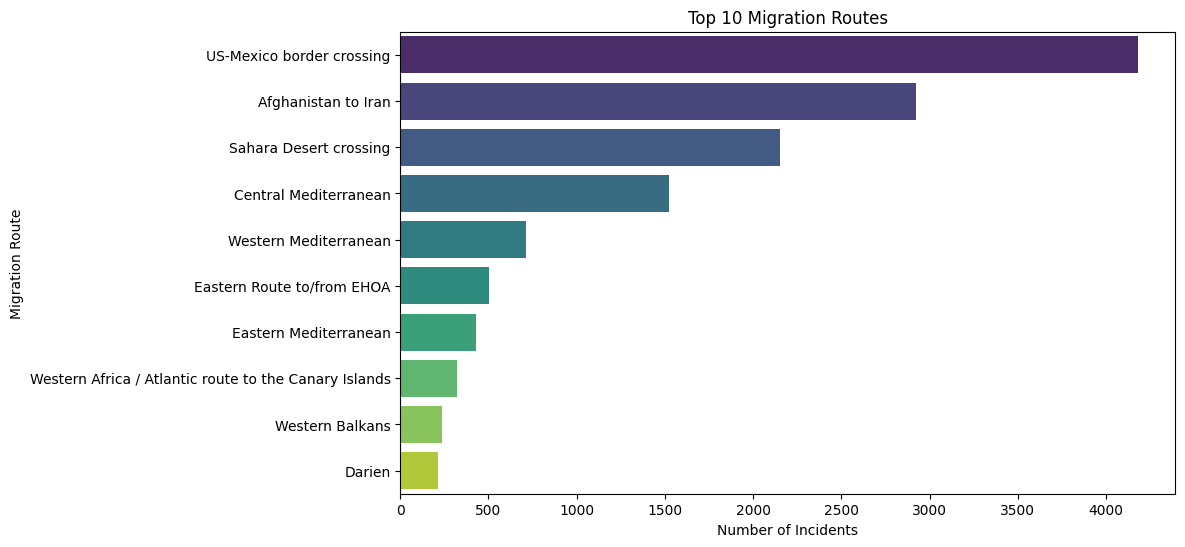

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_migration_routes, x='count', y='migration_route', palette='viridis')
plt.title('Top 10 Migration Routes')
plt.xlabel('Number of Incidents')
plt.ylabel('Migration Route')
plt.show()

   Gender    Count
0    Male  15401.0
1  Female   4542.0


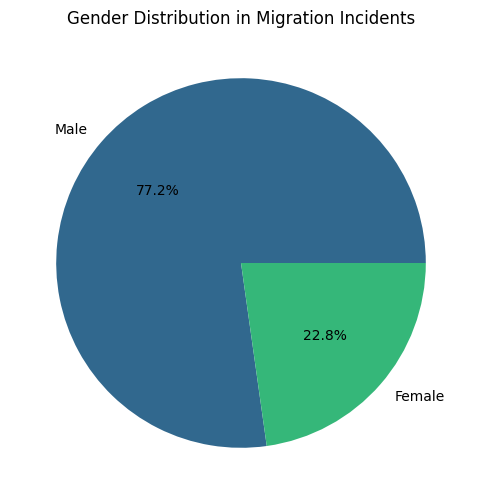

In [ ]:
df.replace(-1, np.nan, inplace=True)

# Calculate the total number of males and females
total_males = df['number_of_male'].sum()
total_females = df['number_of_female'].sum()

# Create a DataFrame for plotting
gender_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [total_males, total_females]
})

# Print the gender data
print(gender_data)

# Plot the gender distribution as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(gender_data['Count'], labels=gender_data['Gender'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(gender_data)))
plt.title('Gender Distribution in Migration Incidents')
plt.show()

/tmp/ipykernel_24353/2844821312.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


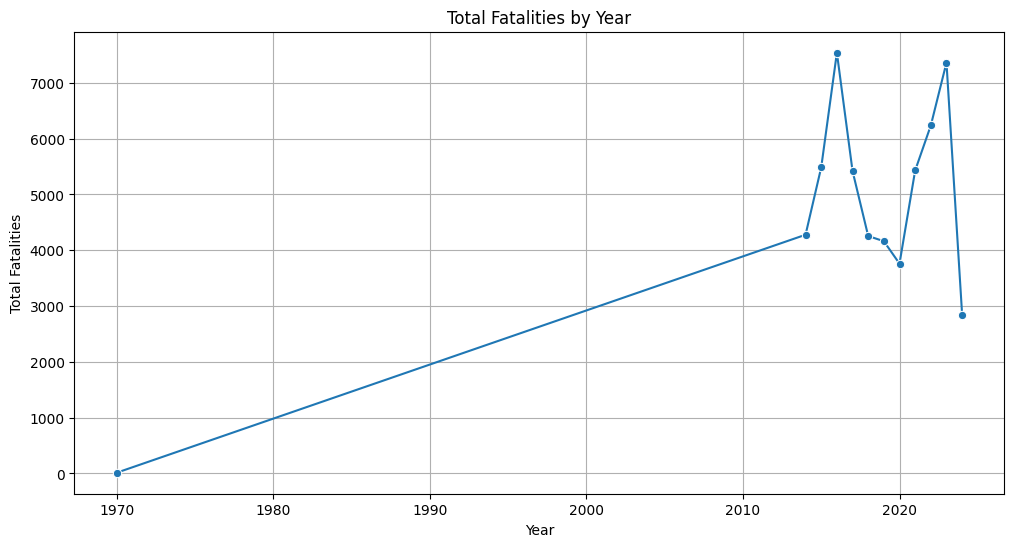

In [ ]:
df.replace(-1, np.nan, inplace=True)

# Fill NaN values with 0
df.fillna(0, inplace=True)

# Ensure reported_date is datetime type
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Extract year and month from reported_date
df['year'] = df['reported_date'].dt.year
df['month'] = df['reported_date'].dt.month

# Calculate total fatalities
df['total_fatalities'] = df['number_dead'] + df['number_missing']

# Group by year and sum fatalities
yearly_fatalities = df.groupby('year')['total_fatalities'].sum().reset_index()

# Sort and select top years with highest fatalities
top_years = yearly_fatalities.sort_values(by='total_fatalities', ascending=False).head(10)

# Plot yearly fatalities
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_fatalities, x='year', y='total_fatalities', marker='o')
plt.title('Total Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.show()


# Group by month and sum fatalities


    month  total_fatalities
5       6            6259.0
3       4            5621.0
7       8            4940.0
4       5            4935.0
6       7            4794.0
9      10            4702.0
8       9            4674.0
11     12            4630.0
10     11            4423.0
1       2            4165.0


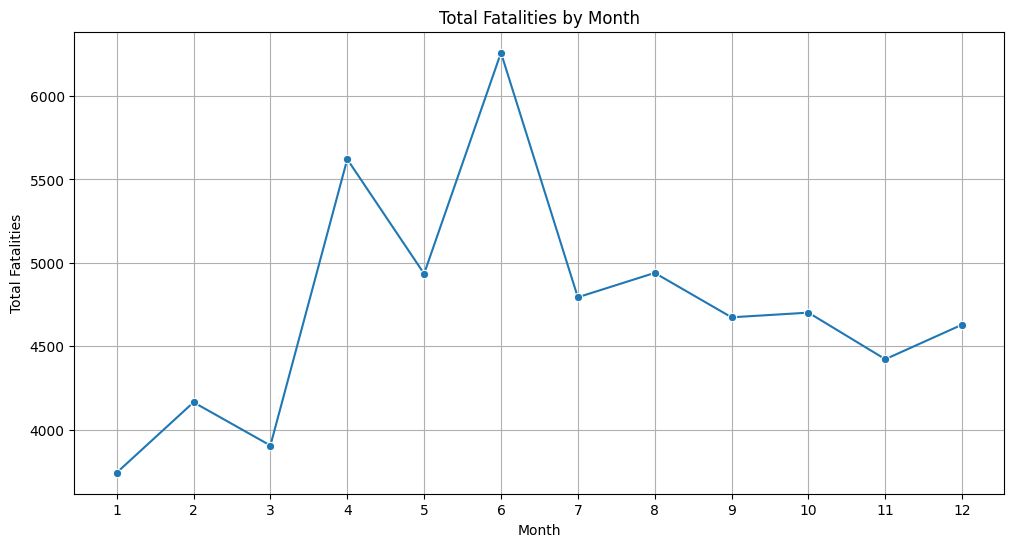

In [ ]:
monthly_fatalities = df.groupby('month')['total_fatalities'].sum().reset_index()

# Sort and select top months with highest fatalities
top_months = monthly_fatalities.sort_values(by='total_fatalities', ascending=False).head(10)
print(top_months)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_fatalities, x='month', y='total_fatalities', marker='o')
plt.title('Total Fatalities by Month')
plt.xlabel('Month')
plt.ylabel('Total Fatalities')
plt.xticks(np.arange(1, 13, 1))  # Ensure month ticks are from 1 to 12
plt.grid(True)
plt.show()

In [ ]:
df['number_dead'] = df['number_dead'].astype(str).str.replace(',', '').astype(float)
df['number_missing'] = df['number_missing'].astype(str).str.replace(',', '').astype(float)
df['number_of_female'] = df['number_of_female'].astype(str).str.replace(',', '').astype(float)
df['number_of_male'] = df['number_of_male'].astype(str).str.replace(',', '').astype(float)
df['number_of_children'] = df['number_of_children'].astype(str).str.replace(',', '').astype(float)
df['total_dead_and_missing'] = df['total_dead_and_missing'].astype(str).str.replace(',', '').astype(float)

df = pd.get_dummies(df, columns=['migration_route', 'region', 'country_of_incident'])

In [ ]:
features = ['year', 'month', 'number_dead', 'number_missing', 'number_of_female', 'number_of_male', 'number_of_children'] + [col for col in df.columns if 'migration_route_' in col or 'unsd_geographic_grouping_' in col]
target = 'total_dead_and_missing'

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Dictionary to store evaluation metrics
metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R²': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    metrics['Model'].append(name)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R²'].append(r2)

    # Print the accuracy metrics for each model
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-Squared (R²): {r2}")
    print("\n")





Model: Linear Regression
Mean Absolute Error (MAE): 0.0009312521213827063
Mean Squared Error (MSE): 7.956525435471684e-06
Root Mean Squared Error (RMSE): 0.002820731365350427
R-Squared (R²): 0.9999999875852789


Model: Ridge Regression
Mean Absolute Error (MAE): 0.0009260069982756869
Mean Squared Error (MSE): 7.826098299265843e-06
Root Mean Squared Error (RMSE): 0.0027975164520098613
R-Squared (R²): 0.9999999877887868


Model: Random Forest
Mean Absolute Error (MAE): 0.4140455594749434
Mean Squared Error (MSE): 204.14123374406762
Root Mean Squared Error (RMSE): 14.28780017161731
R-Squared (R²): 0.6814744686324905


Model: Gradient Boosting
Mean Absolute Error (MAE): 0.44301057040915526
Mean Squared Error (MSE): 198.56601346836163
Root Mean Squared Error (RMSE): 14.09134533919177
R-Squared (R²): 0.6901735930976467


Model: Support Vector
Mean Absolute Error (MAE): 3.4757441069748367
Mean Squared Error (MSE): 642.2910484249131
Root Mean Squared Error (RMSE): 25.343461650392456
R-Squared 

In [2]:


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Dictionary to store evaluation metrics
metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R²': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R²'].append(r2)

    # Print the accuracy metrics for each model
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-Squared (R²): {r2}")
    print("\n")

# Visualization
models = metrics['Model']
mae = metrics['MAE']
mse = metrics['MSE']
rmse = metrics['RMSE']
r2 = metrics['R²']

x = np.arange(len(models))

fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plots for MAE, MSE, RMSE
bar_width = 0.2
ax1.bar(x - bar_width, mae, bar_width, label='MAE', color='b')
ax1.bar(x, mse, bar_width, label='MSE', color='g')
ax1.bar(x + bar_width, rmse, bar_width, label='RMSE', color='r')
ax1.set_xlabel('Models')
ax1.set_ylabel('Error Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)
ax1.legend(loc='upper left')
ax1.set_title('Model Performance Comparison')

# Line plot for R-Squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-Squared')
ax2.plot(x, r2, color='purple', marker='o', linestyle='dashed', linewidth=2, markersize=8, label='R-Squared')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()



NameError: name 'X_train' is not defined

In [1]:


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Dictionary to store evaluation metrics
metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R²': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R²'].append(r2)

    # Print the accuracy metrics for each model
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-Squared (R²): {r2}")
    print("\n")

# Visualization
models = metrics['Model']
mae = metrics['MAE']
mse = metrics['MSE']
rmse = metrics['RMSE']
r2 = metrics['R²']

x = np.arange(len(models))

# Plot for error metrics with logarithmic scale
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_width = 0.2
ax1.bar(x - bar_width, mae, bar_width, label='MAE', color='b')
ax1.bar(x, mse, bar_width, label='MSE', color='g')
ax1.bar(x + bar_width, rmse, bar_width, label='RMSE', color='r')
ax1.set_xlabel('Models')
ax1.set_ylabel('Error Metrics (Log Scale)')
ax1.set_yscale('log')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)
ax1.legend(loc='upper left')
ax1.set_title('Model Performance Comparison (Error Metrics)')

# Plot for R-Squared
fig, ax2 = plt.subplots(figsize=(12, 8))
ax2.plot(x, r2, color='purple', marker='o', linestyle='dashed', linewidth=2, markersize=8, label='R-Squared')
ax2.set_xlabel('Models')
ax2.set_ylabel('R-Squared')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45)
ax2.legend(loc='upper left')
ax2.set_title('Model Performance Comparison (R-Squared)')

fig.tight_layout()
plt.show()


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Evaluation metrics storage
cv_results = {
    'Model': [],
    'MAE Mean': [],
    'MAE Std': [],
    'MSE Mean': [],
    'MSE Std': [],
    'RMSE Mean': [],
    'RMSE Std': [],
    'R² Mean': [],
    'R² Std': []
}

# Perform 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    # Convert negative scores to positive
    mae_scores = -mae_scores
    mse_scores = -mse_scores
    rmse_scores = np.sqrt(mse_scores)

    cv_results['Model'].append(name)
    cv_results['MAE Mean'].append(np.mean(mae_scores))
    cv_results['MAE Std'].append(np.std(mae_scores))
    cv_results['MSE Mean'].append(np.mean(mse_scores))
    cv_results['MSE Std'].append(np.std(mse_scores))
    cv_results['RMSE Mean'].append(np.mean(rmse_scores))
    cv_results['RMSE Std'].append(np.std(rmse_scores))
    cv_results['R² Mean'].append(np.mean(r2_scores))
    cv_results['R² Std'].append(np.std(r2_scores))

# Convert results to DataFrame for better visualization
cv_results_df = pd.DataFrame(cv_results)

print(cv_results_df)


               Model  MAE Mean   MAE Std    MSE Mean     MSE Std  RMSE Mean  \
0  Linear Regression  0.001067  0.000378    0.000419    0.000459   0.015393   
1   Ridge Regression  0.001065  0.000379    0.000419    0.000459   0.015387   
2      Random Forest  0.208399  0.142048   49.879384  111.967242   4.715240   
3  Gradient Boosting  0.226466  0.150815   42.174739  107.048181   3.664850   
4     Support Vector  2.997314  0.393135  321.037491  208.225229  17.069503   

   RMSE Std   R² Mean    R² Std  
0  0.013511  0.999998  0.000002  
1  0.013517  0.999998  0.000002  
2  5.257936  0.920476  0.128392  
3  5.361307  0.935503  0.128437  
4  5.446977 -0.012843  0.012431  


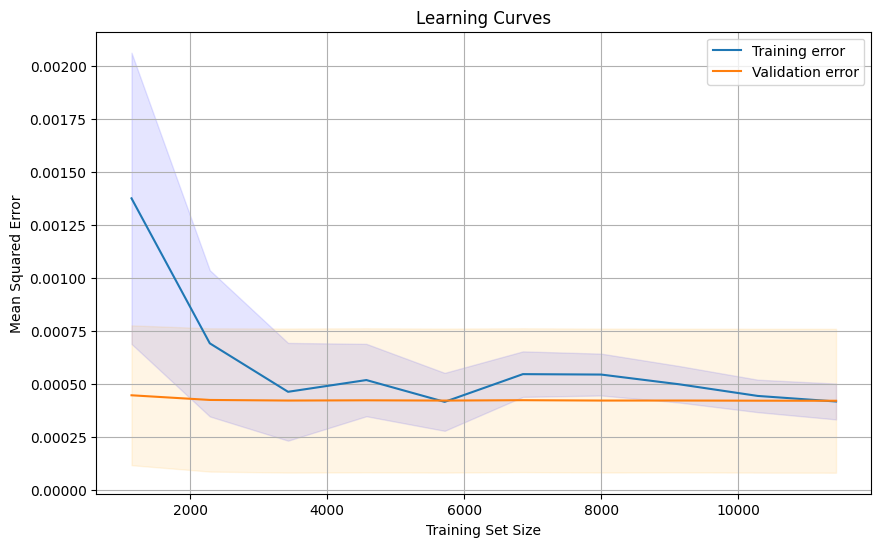

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define the model
model = LinearRegression()

# Compute learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error'  # You can use other metrics like 'accuracy' for classification
)

# Calculate the mean and standard deviation of training and validation scores
train_mean = -train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
validation_mean = -validation_scores.mean(axis=1)
validation_std = validation_scores.std(axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, validation_mean, label='Validation error')

# Plot the standard deviation as a shaded region
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()


In [3]:

from sklearn.model_selection import learning_curve


# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Set up the plot
plt.figure(figsize=(20, 12))

# Loop through each model
for model_name, model in models.items():
    # Compute learning curves
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,  # Number of cross-validation folds
        scoring='neg_mean_squared_error'
    )

    # Calculate the mean and standard deviation of training and validation scores
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    validation_mean = -validation_scores.mean(axis=1)
    validation_std = validation_scores.std(axis=1)

    # Plot the learning curves
    plt.subplot(3, 2, list(models.keys()).index(model_name) + 1)
    plt.plot(train_sizes, train_mean, label='Training error')
    plt.plot(train_sizes, validation_mean, label='Validation error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')
    plt.title(f'Learning Curves: {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


NameError: name 'X' is not defined

<Figure size 2000x1200 with 0 Axes>

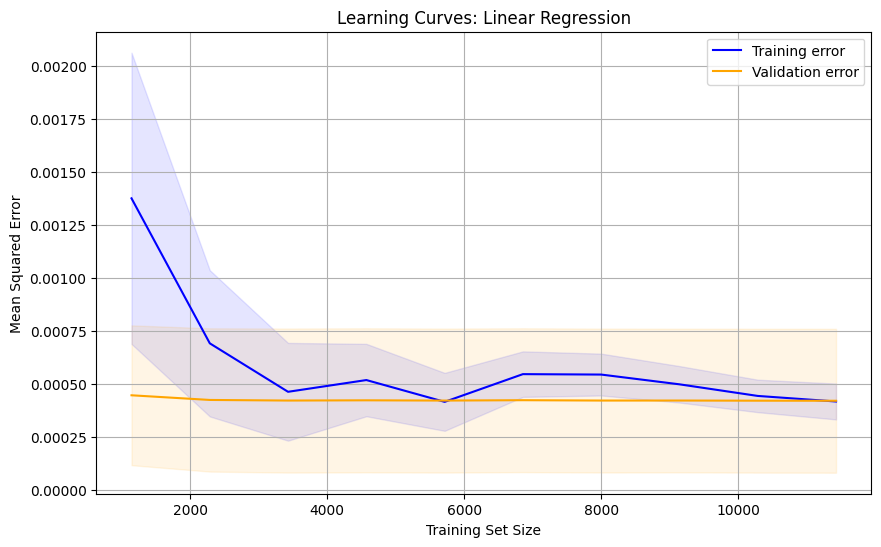

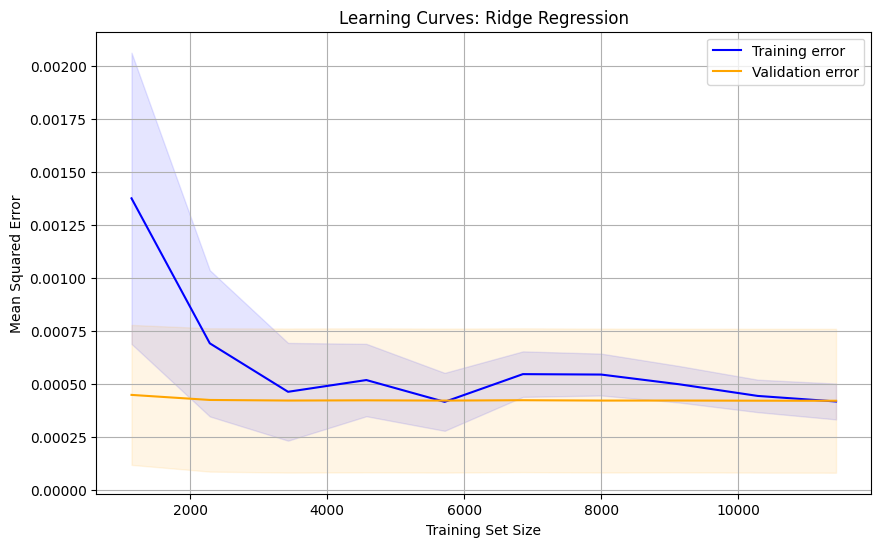

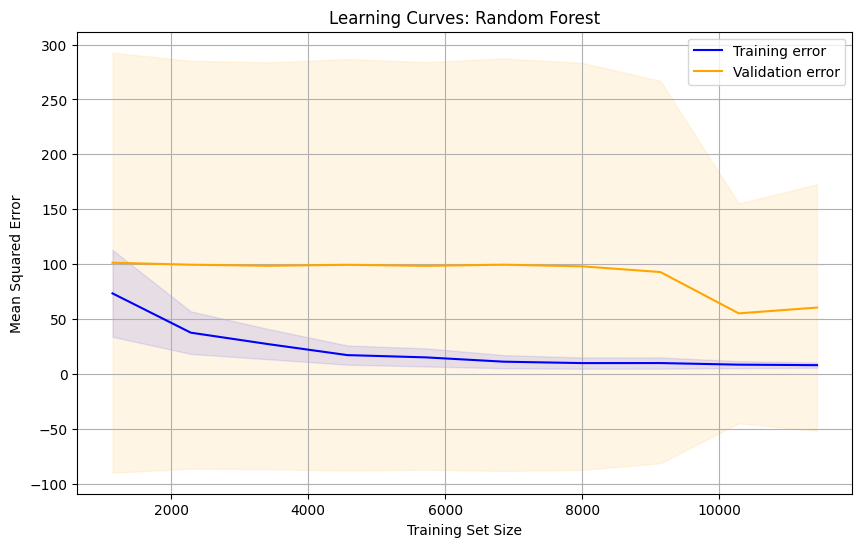

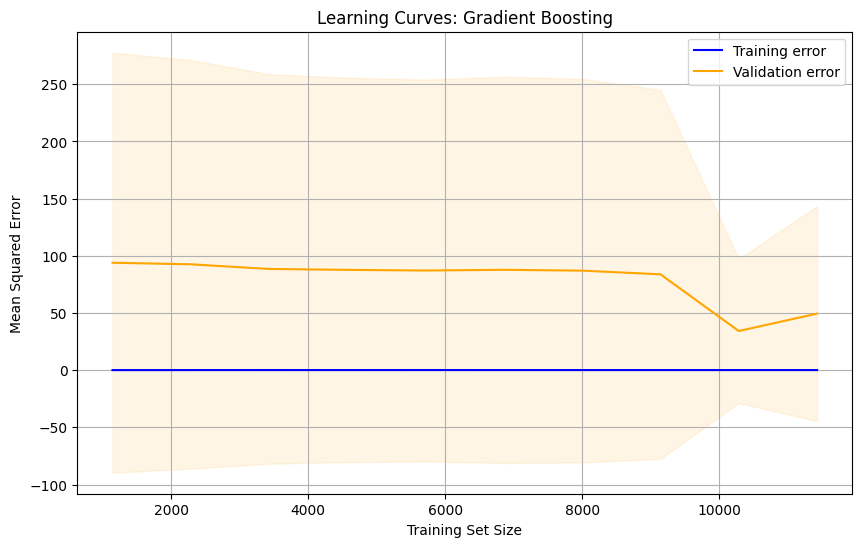

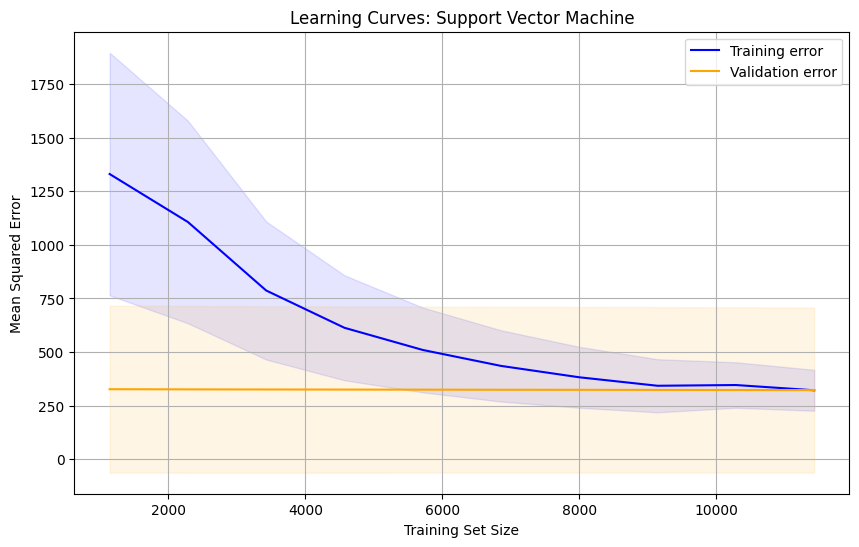

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Loop through each model to plot separate learning curves
for model_name, model in models.items():
    # Compute learning curves
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,  # Number of cross-validation folds
        scoring='neg_mean_squared_error'  # You can use other metrics like 'accuracy' for classification
    )

    # Calculate the mean and standard deviation of training and validation scores
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    validation_mean = -validation_scores.mean(axis=1)
    validation_std = validation_scores.std(axis=1)

    # Set up the plot for each model
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training error', color='blue')
    plt.plot(train_sizes, validation_mean, label='Validation error', color='orange')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='orange')
    plt.title(f'Learning Curves: {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid()
    plt.show()


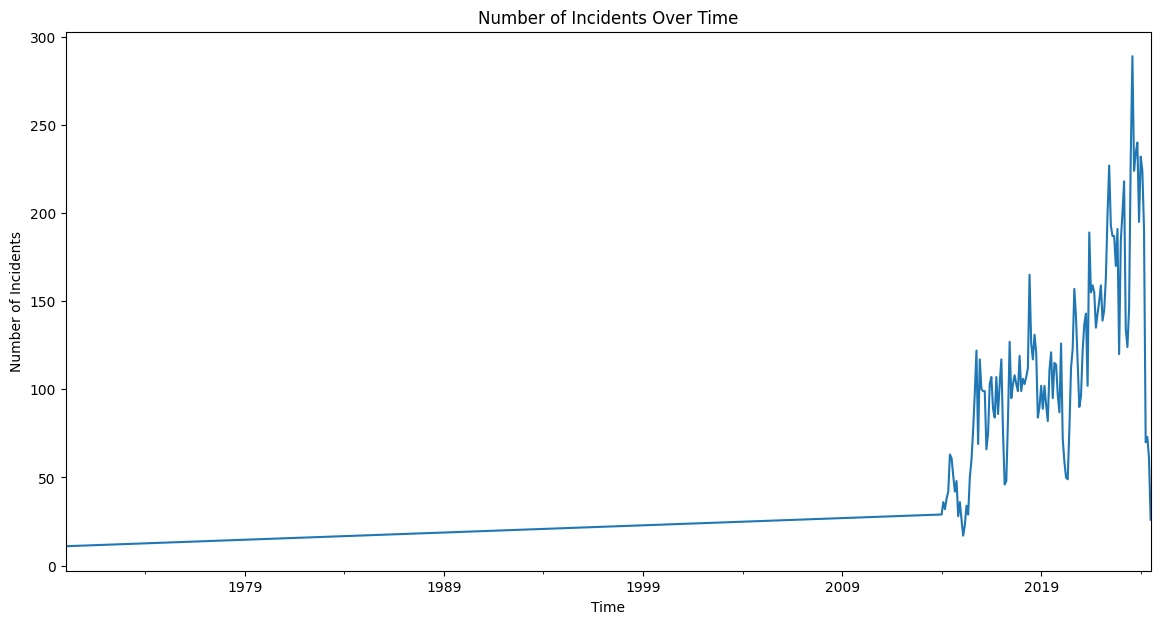

In [ ]:
df['reported_date'] = pd.to_datetime(df['reported_date'])
df['year_month'] = df['reported_date'].dt.to_period('M')

incidents_over_time = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
incidents_over_time.plot(kind='line')
plt.title('Number of Incidents Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.show()

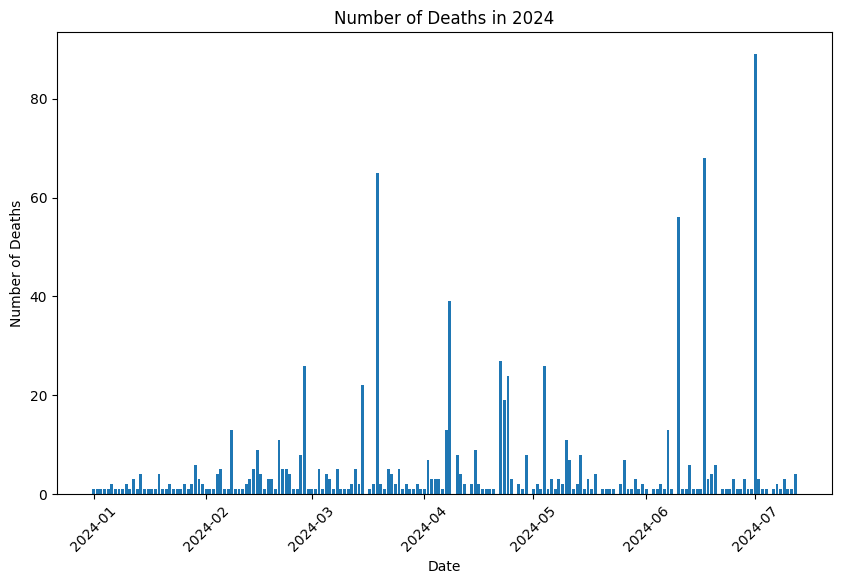

In [ ]:
# Generate predictions
df['reported_date'] = pd.to_datetime(df['reported_date'])

# Filter data for incidents reported in 2024
data_2024 = df[df['reported_date'].dt.year == 2024]

# Display the filtered data
data_2024.head()
plt.figure(figsize=(10, 6))
plt.bar(data_2024['reported_date'], data_2024['number_dead'])
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths in 2024')
plt.xticks(rotation=45)
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=   3.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=   4.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=203; total time=  10.4s
[CV] END max_depth=20, max_features=log2

/home/aman/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
73 fits failed with the following error:
Traceback (most recent call last):
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/aman/.local/lib/pyth

Best parameters from Randomized Search: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}
Training R^2: 0.9265305266521797
Validation R^2: 0.5777885190716403


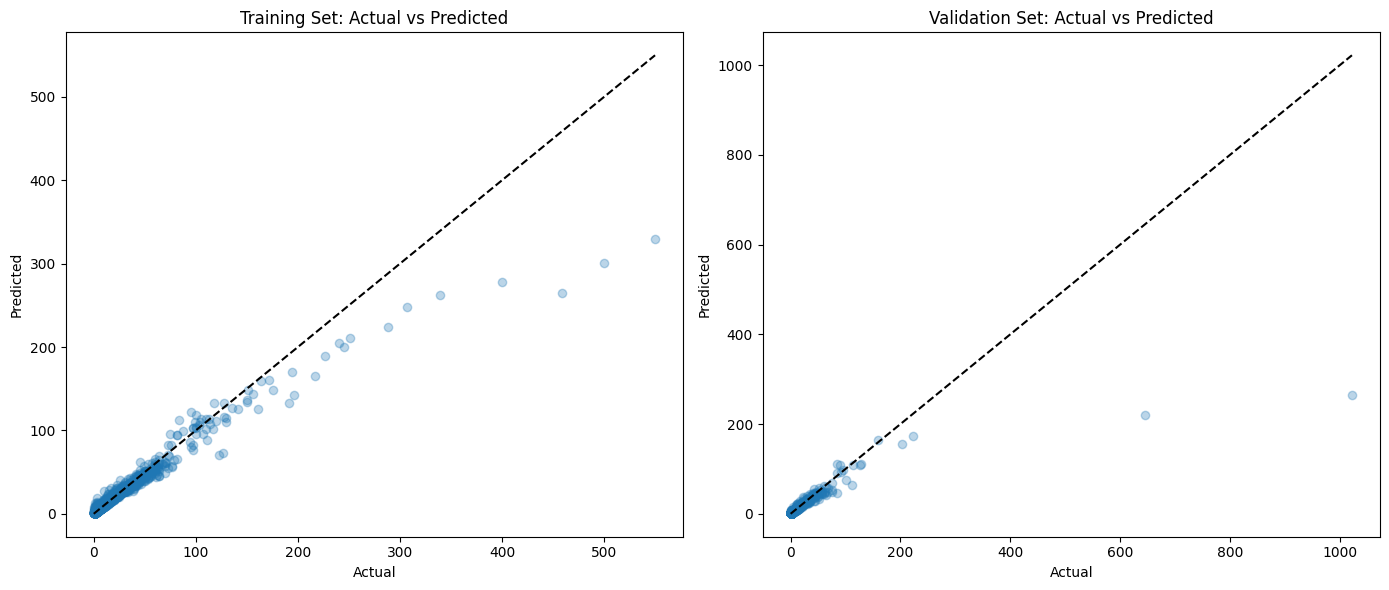

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor()

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Best parameters from Randomized Search
best_params = random_search.best_params_
print(f"Best parameters from Randomized Search: {best_params}")

# Train the model with the best parameters
best_rf = random_search.best_estimator_

# Evaluate the model
train_r2 = best_rf.score(X_train, y_train)
val_r2 = best_rf.score(X_val, y_val)
print(f"Training R^2: {train_r2}")
print(f"Validation R^2: {val_r2}")

# Predictions for visualization
y_train_pred = best_rf.predict(X_train)
y_val_pred = best_rf.predict(X_val)

# Plotting Actual vs Predicted for both Training and Validation sets
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')

# Validation set
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Validation Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

Linear Regression - Training time: 0.7505 seconds, Prediction time: 0.0236 seconds
Ridge Regression - Training time: 0.0882 seconds, Prediction time: 0.0350 seconds
Random Forest - Training time: 4.3620 seconds, Prediction time: 0.0397 seconds
Gradient Boosting - Training time: 1.3505 seconds, Prediction time: 0.0062 seconds
Support Vector Machine - Training time: 14.7159 seconds, Prediction time: 2.8393 seconds


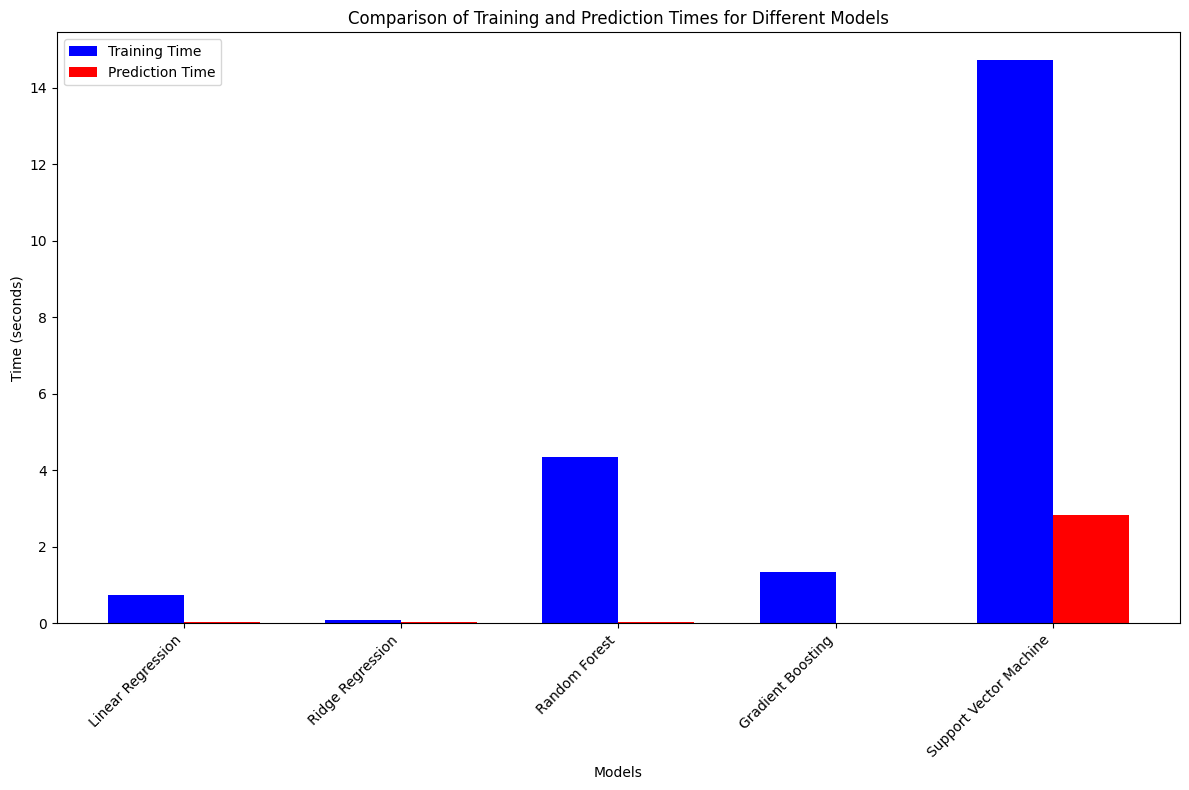

In [ ]:
import time
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Dictionary to store training and prediction times
times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_val)
    predict_time = time.time() - start_time

    times[name] = {'train_time': train_time, 'predict_time': predict_time}

# Print the results
for name, timing in times.items():
    print(f"{name} - Training time: {timing['train_time']:.4f} seconds, Prediction time: {timing['predict_time']:.4f} seconds")
model_names = list(times.keys())
train_times = [times[name]['train_time'] for name in model_names]
predict_times = [times[name]['predict_time'] for name in model_names]

# Plotting the training and prediction times
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(model_names))

# Bar plots for training and prediction times
bars1 = ax.bar(index, train_times, bar_width, label='Training Time', color='b')
bars2 = ax.bar([i + bar_width for i in index], predict_times, bar_width, label='Prediction Time', color='r')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Training and Prediction Times for Different Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared

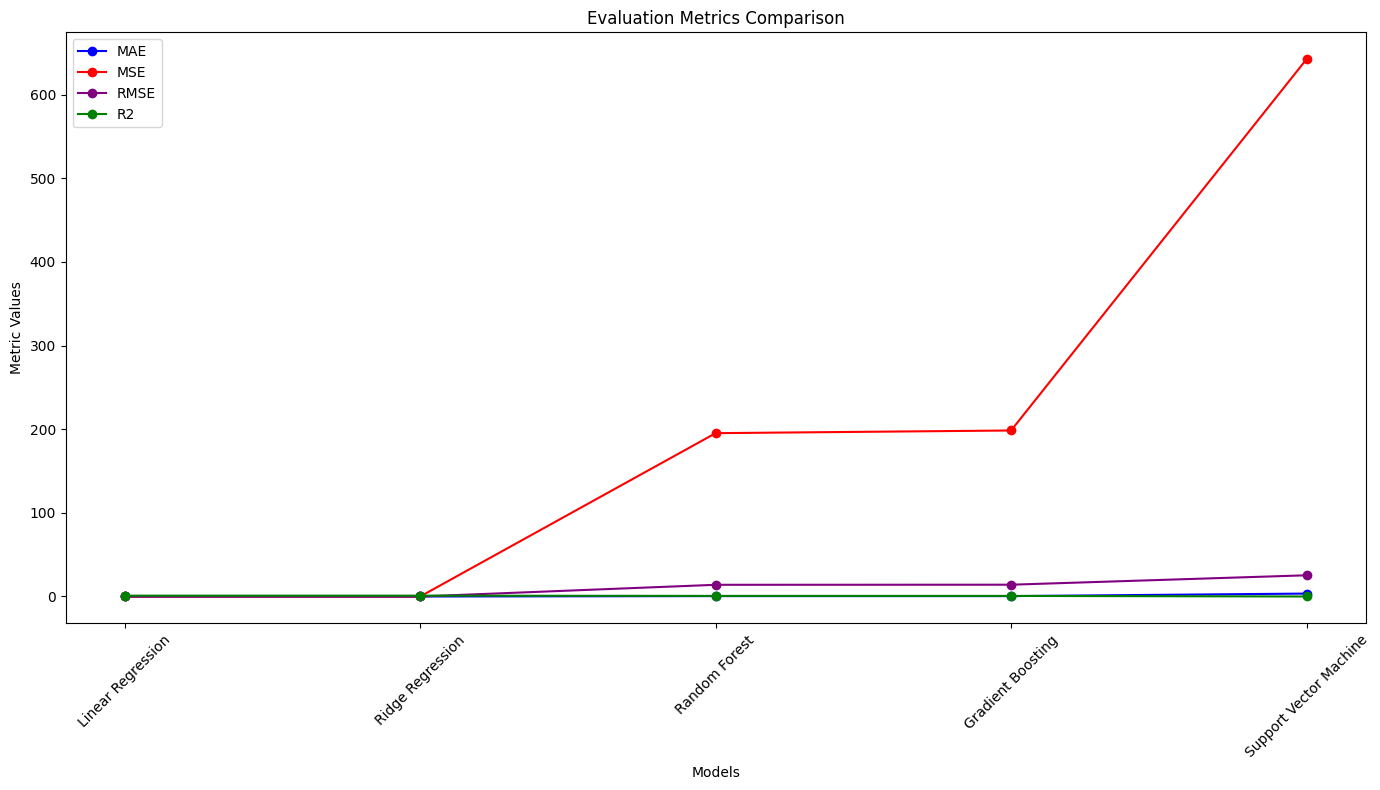

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Dictionary to store evaluation metrics
metrics = {
    'MAE': {},
    'MSE': {},
    'RMSE': {},
    'R2': {}
}

# Calculate evaluation metrics for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    metrics['MAE'][name] = mean_absolute_error(y_val, y_pred)
    metrics['MSE'][name] = mean_squared_error(y_val, y_pred)
    metrics['RMSE'][name] = mean_squared_error(y_val, y_pred, squared=False)  # RMSE calculation
    metrics['R2'][name] = r2_score(y_val, y_pred)

# Extracting data for visualization
model_names = list(models.keys())
mae_values = [metrics['MAE'][name] for name in model_names]
mse_values = [metrics['MSE'][name] for name in model_names]
rmse_values = [metrics['RMSE'][name] for name in model_names]
r2_values = [metrics['R2'][name] for name in model_names]

# Plotting the evaluation metrics in a single line chart
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(model_names, mae_values, marker='o', label='MAE', color='b')
ax.plot(model_names, mse_values, marker='o', label='MSE', color='r')
ax.plot(model_names, rmse_values, marker='o', label='RMSE', color='purple')
ax.plot(model_names, r2_values, marker='o', label='R2', color='g')

# Adding labels and title
ax.set_title('Evaluation Metrics Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared

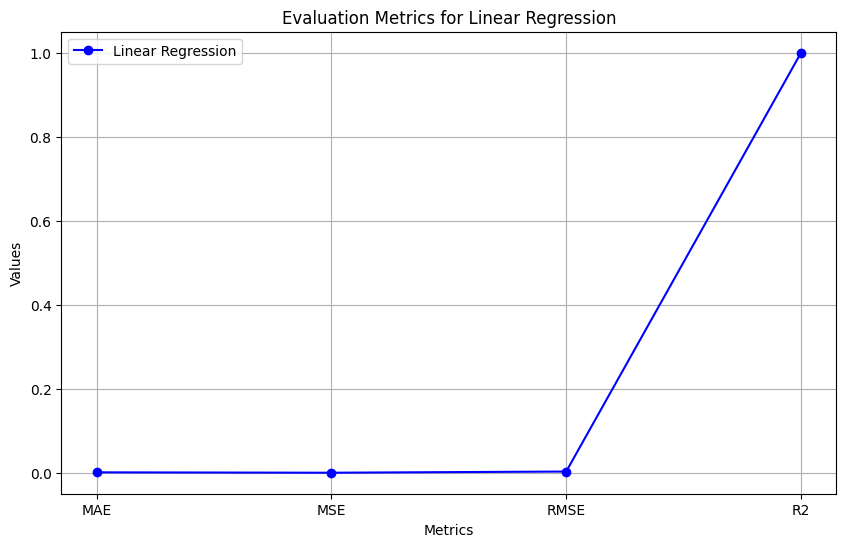

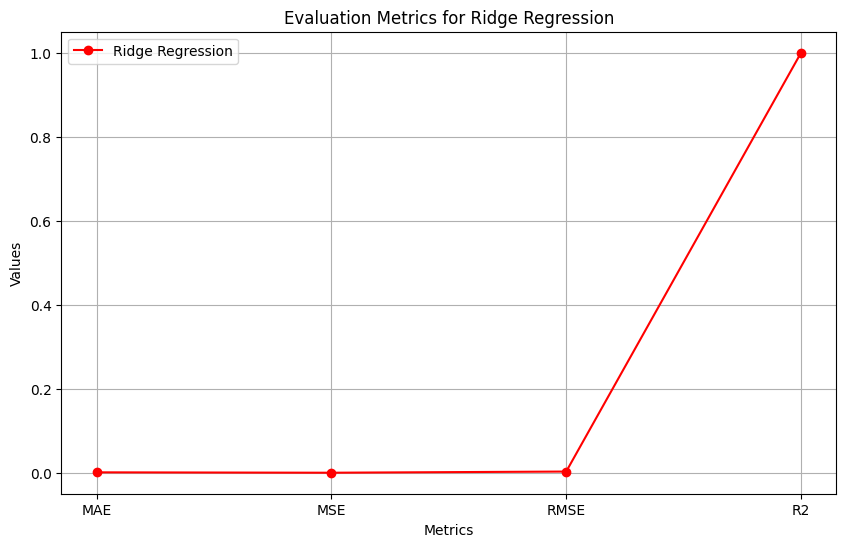

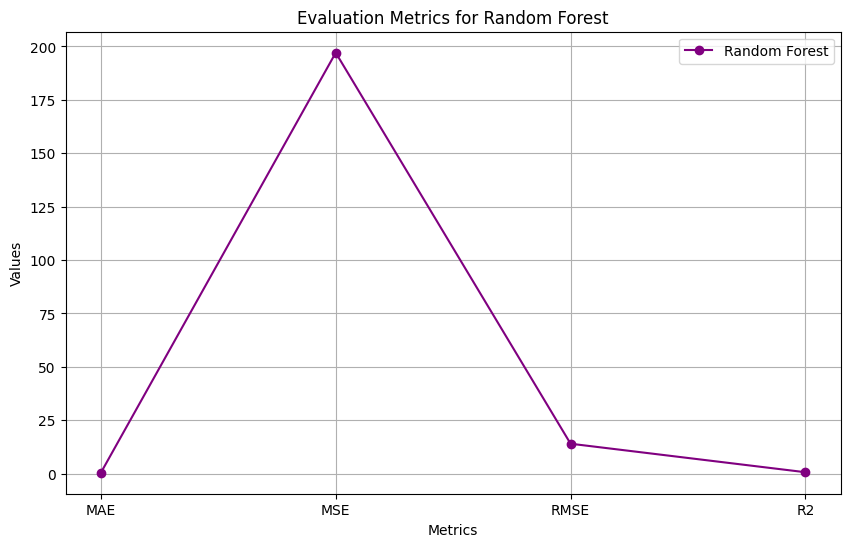

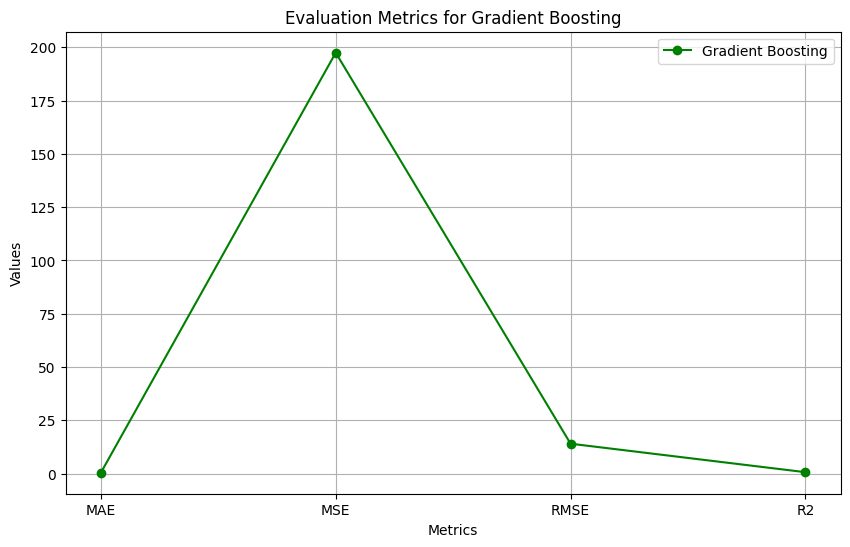

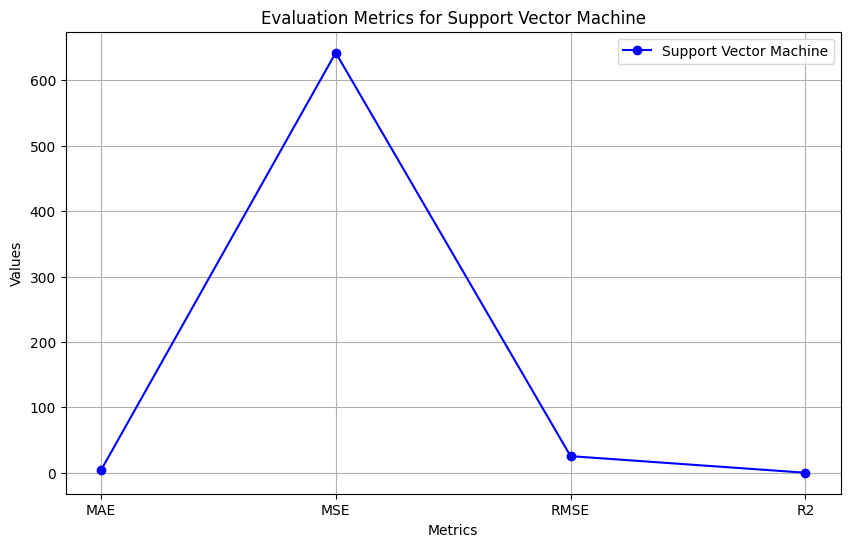

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Dictionary to store evaluation metrics
metrics = {
    'MAE': {},
    'MSE': {},
    'RMSE': {},
    'R2': {}
}

# Calculate evaluation metrics for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    metrics['MAE'][name] = mean_absolute_error(y_val, y_pred)
    metrics['MSE'][name] = mean_squared_error(y_val, y_pred)
    metrics['RMSE'][name] = mean_squared_error(y_val, y_pred, squared=False)  # RMSE calculation
    metrics['R2'][name] = r2_score(y_val, y_pred)

# Extracting data for visualization
model_names = list(models.keys())
mae_values = [metrics['MAE'][name] for name in model_names]
mse_values = [metrics['MSE'][name] for name in model_names]
rmse_values = [metrics['RMSE'][name] for name in model_names]
r2_values = [metrics['R2'][name] for name in model_names]

# Colors for each metric
colors = ['b', 'r', 'purple', 'g']

# Plotting the evaluation metrics separately for each model
for i, model_name in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(10, 6))

    metric_values = [mae_values[i], mse_values[i], rmse_values[i], r2_values[i]]
    metric_names = ['MAE', 'MSE', 'RMSE', 'R2']

    ax.plot(metric_names, metric_values, marker='o', color=colors[i % len(colors)], label=model_name)

    # Adding labels and title
    ax.set_title(f'Evaluation Metrics for {model_name}')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.legend()

    # Display the plot
    plt.grid(True)
    plt.show()


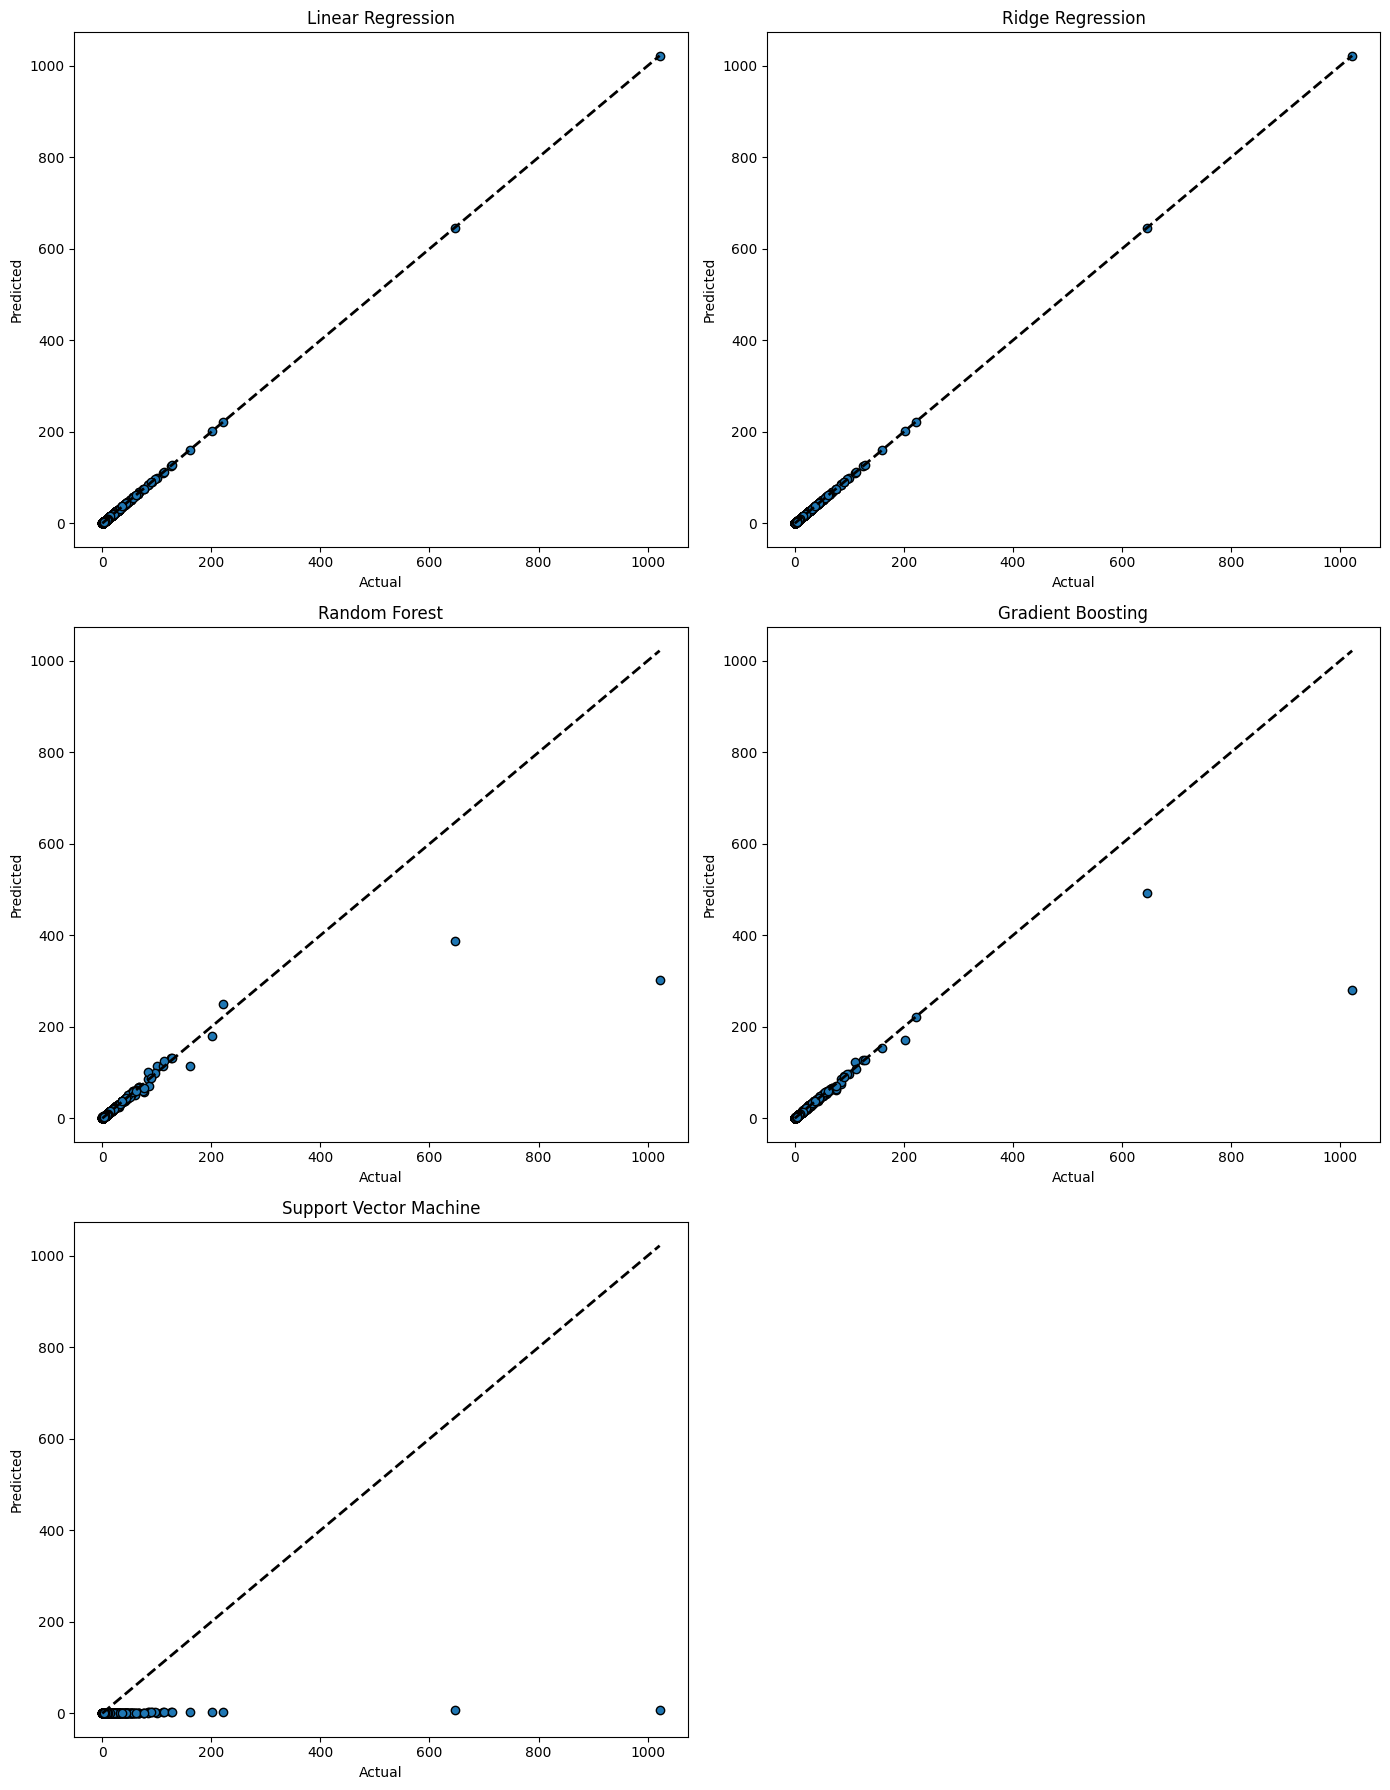

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=4),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Plotting actual vs predicted values for each model
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Scatter plot of actual vs predicted values
    axes[idx].scatter(y_val, y_pred, edgecolors=(0, 0, 0))
    axes[idx].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2)
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')

fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

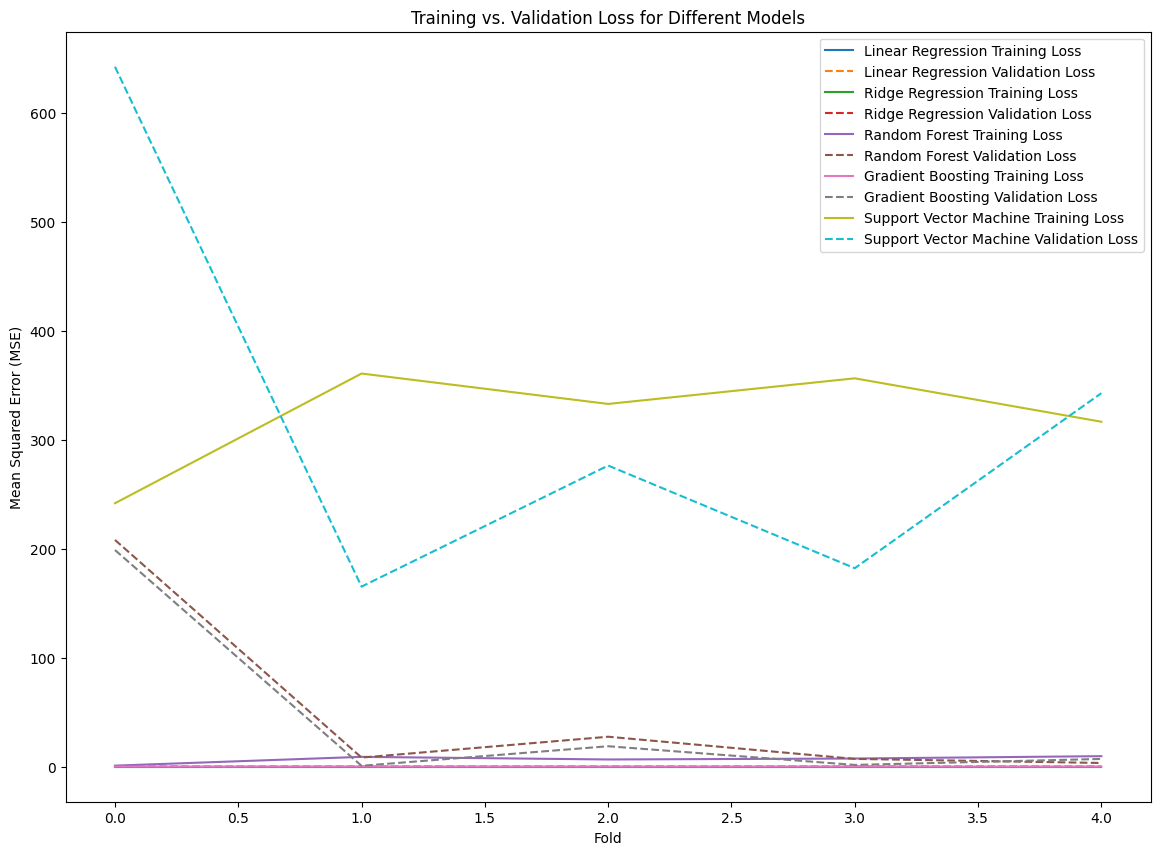

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Record training and validation losses
training_losses = {name: [] for name in models.keys()}
validation_losses = {name: [] for name in models.keys()}

# Split the dataset into training and validation sets and record losses
for name, model in models.items():
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)

        # Calculate training loss
        y_train_pred = model.predict(X_train)
        train_loss = mean_squared_error(y_train, y_train_pred)
        training_losses[name].append(train_loss)

        # Calculate validation loss
        y_val_pred = model.predict(X_val)
        val_loss = mean_squared_error(y_val, y_val_pred)
        validation_losses[name].append(val_loss)

# Plot training and validation losses
plt.figure(figsize=(14, 10))
for name in models.keys():
    plt.plot(training_losses[name], label=f'{name} Training Loss')
    plt.plot(validation_losses[name], linestyle='--', label=f'{name} Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Validation Loss for Different Models')
plt.legend()
plt.show()


In [4]:


# Example data
# X, y = your_data

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Record training and validation losses
training_losses = {name: [] for name in models.keys()}
validation_losses = {name: [] for name in models.keys()}

# Split the dataset into training and validation sets and record losses
for name, model in models.items():
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)

        # Calculate training loss
        y_train_pred = model.predict(X_train)
        train_loss = mean_squared_error(y_train, y_train_pred)
        training_losses[name].append(train_loss)

        # Calculate validation loss
        y_val_pred = model.predict(X_val)
        val_loss = mean_squared_error(y_val, y_val_pred)
        validation_losses[name].append(val_loss)

# Plot training and validation losses separately for each model
for name in models.keys():
    plt.figure(figsize=(10, 6))
    plt.plot(training_losses[name], marker='o', label=f'{name} Training Loss', color='b')
    plt.plot(validation_losses[name], marker='x', linestyle='--', label=f'{name} Validation Loss', color='r')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title(f'Training vs. Validation Loss for {name}')
    plt.legend()
    plt.grid(True)
    plt.show()


NameError: name 'X' is not defined

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found by Random Search:", random_search.best_params_)
print("Best score achieved:", random_search.best_score_)

Best parameters found by Random Search: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 112}
Best score achieved: -51.303057234218066


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters found by Random Search
best_params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 112}

# Define the Random Forest model with the best parameters
optimized_rf_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Fit the model on the training data
optimized_rf_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = optimized_rf_model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Optimized Random Forest Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

Optimized Random Forest Model Performance:
MAE: 0.4297952930848053
MSE: 209.69102782027878
RMSE: 14.48071226909363
R2: 0.6728150171601749


/home/aman/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   3.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

/home/aman/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/aman/.local/lib/pytho

Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Score (MSE): 49.36895132888997
Mean Squared Error on Test Data: 266.1048486709054
Feature importances:
1. feature 3 (0.5232134480802411)
2. feature 2 (0.18735379556069992)
3. feature 4 (0.06426239706396517)
4. feature 5 (0.0522558811415472)
5. feature 6 (0.04850505636733492)
6. feature 0 (0.043931568163324705)
7. feature 1 (0.03662646278580794)
8. feature 11 (0.025667648002986154)
9. feature 31 (0.005012994729019905)
10. feature 28 (0.004152221065936312)
11. feature 16 (0.002205656262303054)
12. feature 7 (0.0015400761933365371)
13. feature 24 (0.0013974781897495092)
14. feature 33 (0.000934431349670463)
15. feature 15 (0.0008749758136586883)
16. feature 14 (0.00040273207867518957)
17. feature 23 (0.0003517772484236608)
18. feature 25 (0.00031321212391486215)
19. feature 10 (0.00028054835362740545)
20. feature 30 (0.00021654190768799464)
21. feature 13 (0.

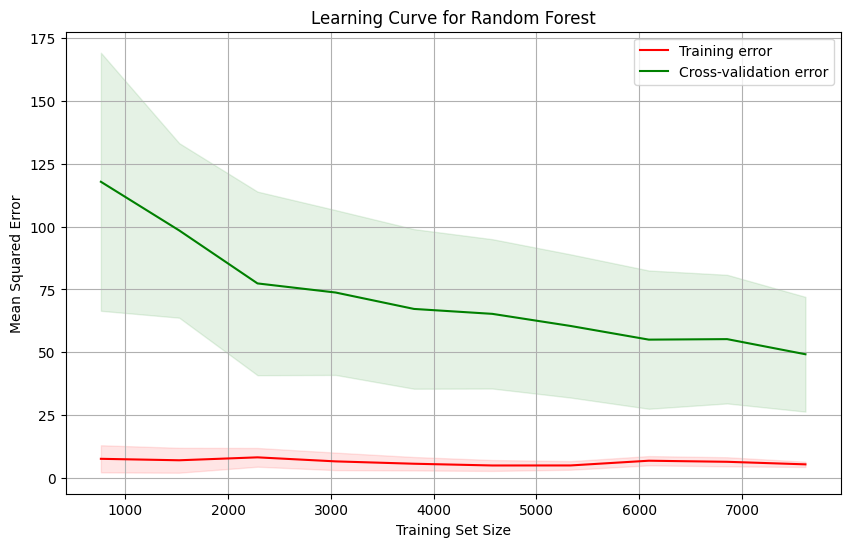

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define a smaller hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150],  # Reduced number of estimators
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Set up Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2,
                                   scoring='neg_mean_squared_error', random_state=42)

# Fit the Randomized Search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score (MSE): {-random_search.best_score_}")

# Retrieve the best model
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Optional: Further analysis (e.g., feature importances, residuals)
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. feature {indices[i]} ({importances[indices[i]]})")
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=3, scoring='neg_mean_squared_error',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)  # Convert to positive MSE
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)    # Convert to positive MSE
test_scores_std = np.std(test_scores, axis=1)
# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error", color="r")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation error", color="g")

# Plot the standard deviation as a transparent range at each training size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="g", alpha=0.1)

# Labels and title
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   1.7s
[CV] END 

/home/aman/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/aman/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/aman/.local/lib/python3

Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.05}
Best Score (MSE): 21.597889534183945
Mean Squared Error on Test Data: 221.10122342762932


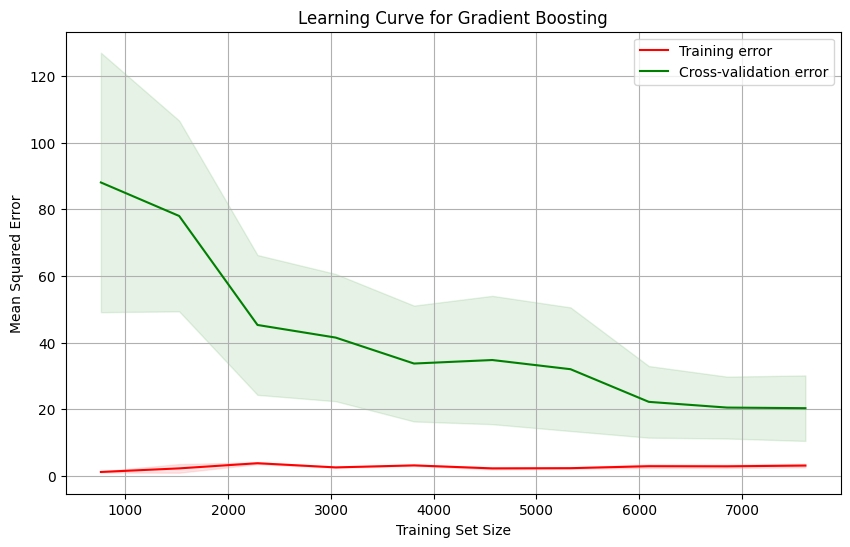

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Define a parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2,
                                   scoring='neg_mean_squared_error', random_state=42)

# Fit the Randomized Search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score (MSE): {-random_search.best_score_}")

# Retrieve the best model
best_gb = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_gb.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_gb, X_train, y_train, cv=3, scoring='neg_mean_squared_error',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)  # Convert to positive MSE
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)    # Convert to positive MSE
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training error", color="r")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation error", color="g")

# Plot the standard deviation as a transparent range at each training size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="g", alpha=0.1)

# Labels and title
plt.title("Learning Curve for Gradient Boosting")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

/tmp/ipykernel_24353/4076396045.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=routes_df, x='Fatalities', y='Route', palette='viridis')


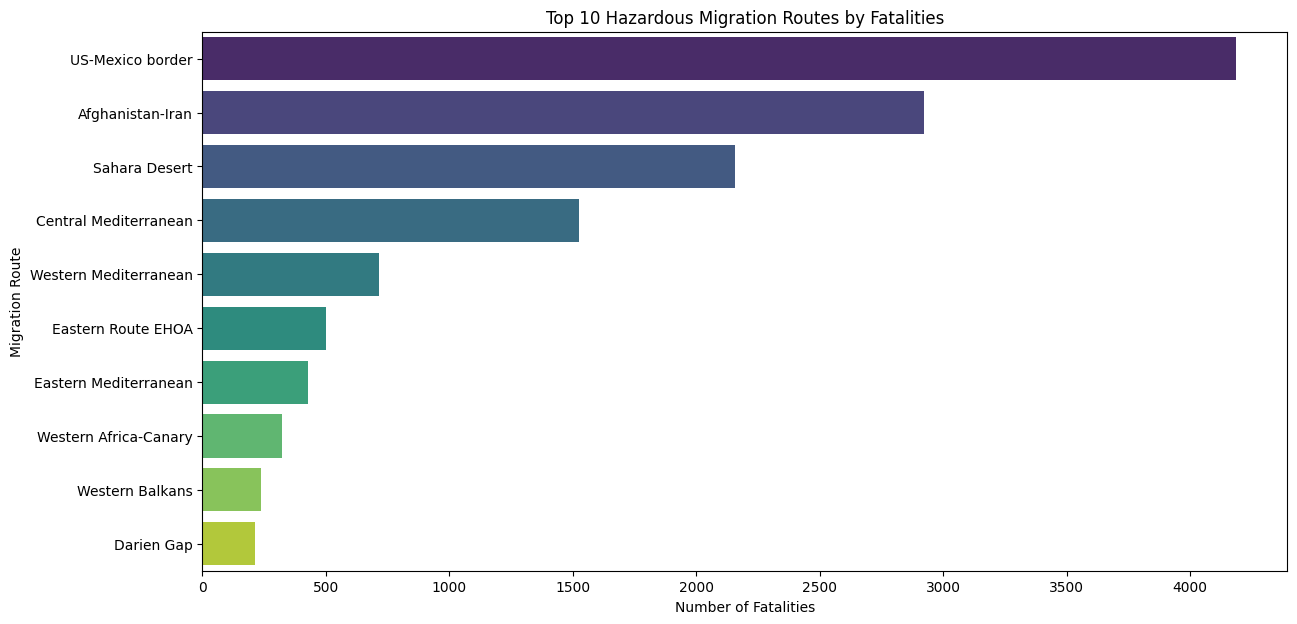

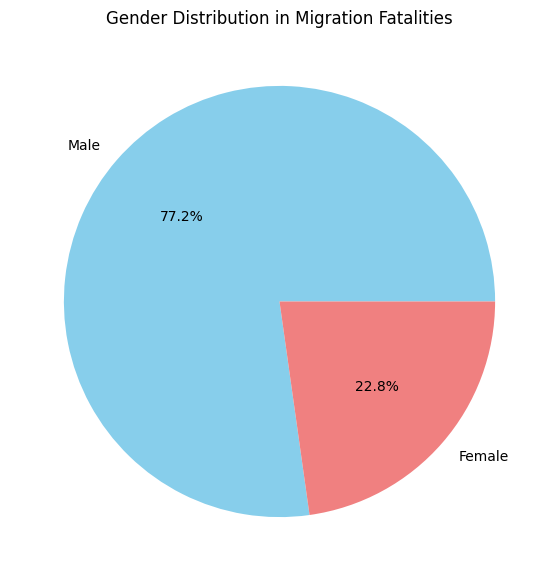

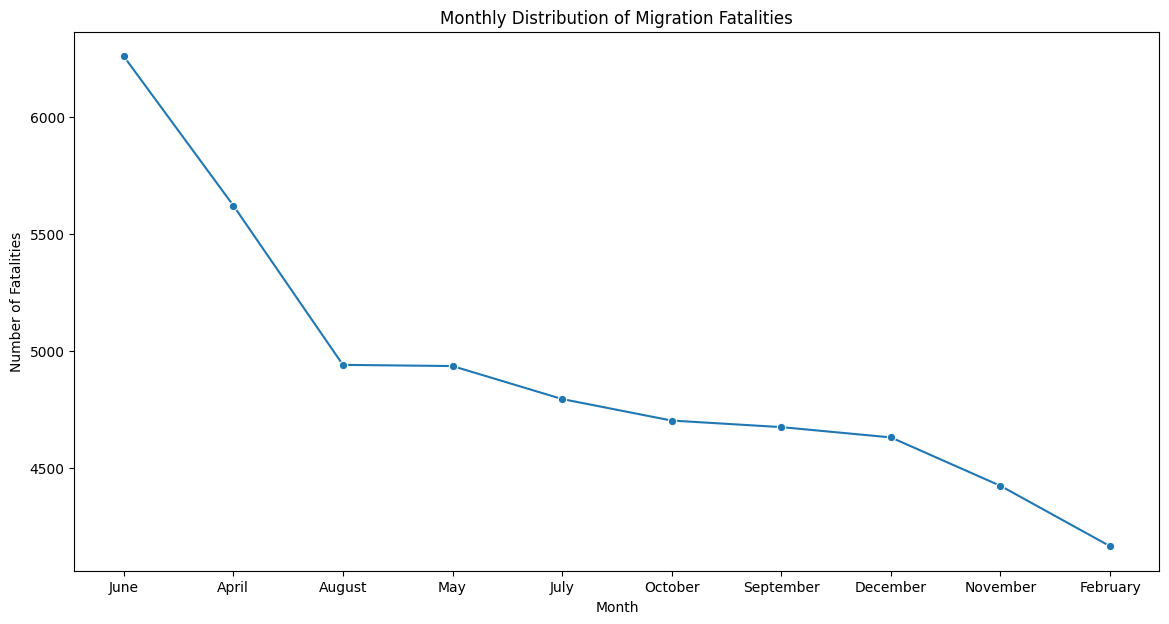

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hazardous Migration Routes
routes_data = {
    'Route': ['US-Mexico border', 'Afghanistan-Iran', 'Sahara Desert', 'Central Mediterranean',
              'Western Mediterranean', 'Eastern Route EHOA', 'Eastern Mediterranean',
              'Western Africa-Canary', 'Western Balkans', 'Darien Gap'],
    'Fatalities': [4184, 2922, 2155, 1524, 714, 501, 427, 323, 238, 214]
}
routes_df = pd.DataFrame(routes_data)
plt.figure(figsize=(14, 7))
sns.barplot(data=routes_df, x='Fatalities', y='Route', palette='viridis')
plt.title('Top 10 Hazardous Migration Routes by Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Migration Route')
plt.show()

# Gender Distribution
gender_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Count': [15401, 4542]
})
plt.figure(figsize=(7, 7))
plt.pie(gender_data['Count'], labels=gender_data['Gender'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution in Migration Fatalities')
plt.show()

# Monthly Fatalities
monthly_data = {
    'Month': ['June', 'April', 'August', 'May', 'July', 'October', 'September', 'December', 'November', 'February'],
    'Fatalities': [6259, 5621, 4940, 4935, 4794, 4702, 4674, 4630, 4423, 4165]
}
monthly_df = pd.DataFrame(monthly_data)
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_df, x='Month', y='Fatalities', marker='o')
plt.title('Monthly Distribution of Migration Fatalities')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.show()


Model: Linear Regression
Train Mean Absolute Error (MAE): 0.0013162585101055798
Test Mean Absolute Error (MAE): 0.0009312521213827063
Train Mean Squared Error (MSE): 0.0005188544957795346
Test Mean Squared Error (MSE): 7.956525435471684e-06
Train R-Squared (R²): 0.9999978255765364
Test R-Squared (R²): 0.9999999875852789


Model: Ridge Regression
Train Mean Absolute Error (MAE): 0.0013133772842255078
Test Mean Absolute Error (MAE): 0.0009260069982756869
Train Mean Squared Error (MSE): 0.0005188553752264449
Test Mean Squared Error (MSE): 7.826098299265843e-06
Train R-Squared (R²): 0.9999978255728508
Test R-Squared (R²): 0.9999999877887868


Model: Random Forest
Train Mean Absolute Error (MAE): 0.05245398756386852
Test Mean Absolute Error (MAE): 0.41145034335050085
Train Mean Squared Error (MSE): 0.8461716495000561
Test Mean Squared Error (MSE): 205.3900541301588
Train R-Squared (R²): 0.9964538507348514
Test R-Squared (R²): 0.6795259099323852


Model: Gradient Boosting
Train Mean Absolute

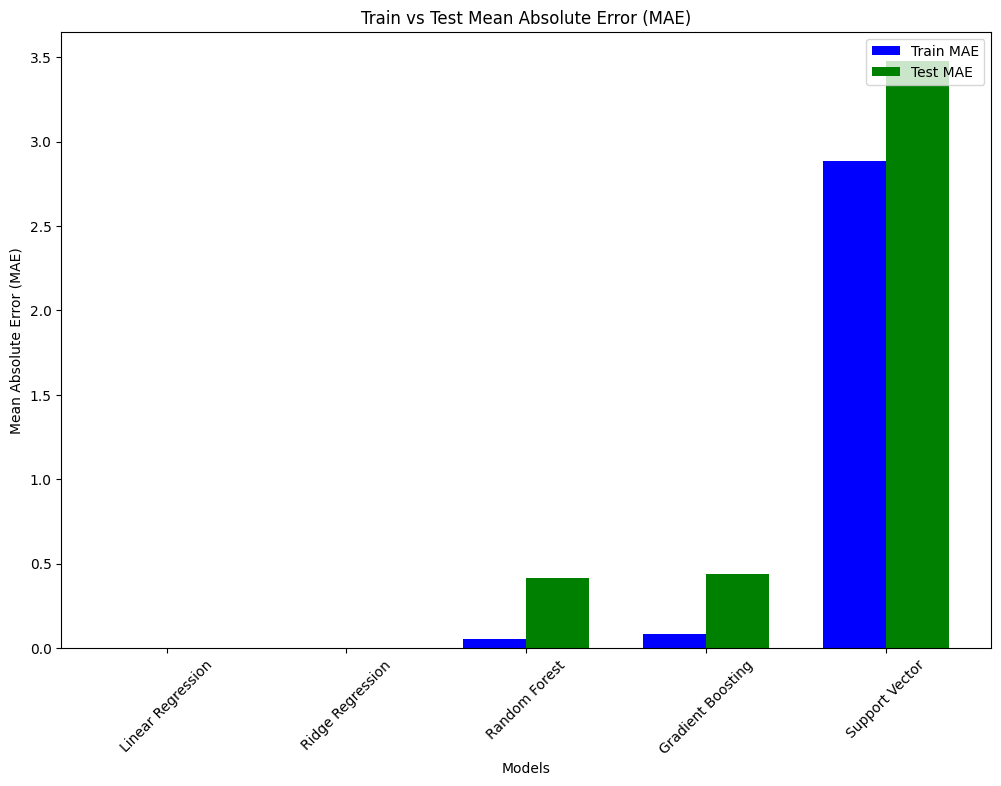

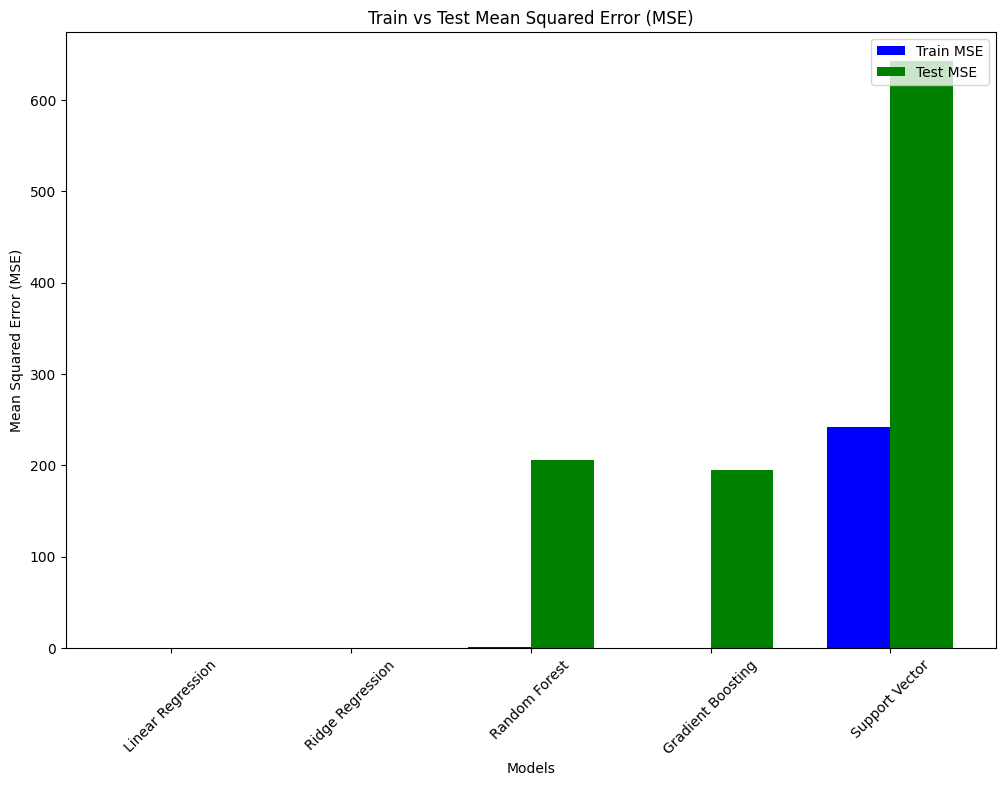

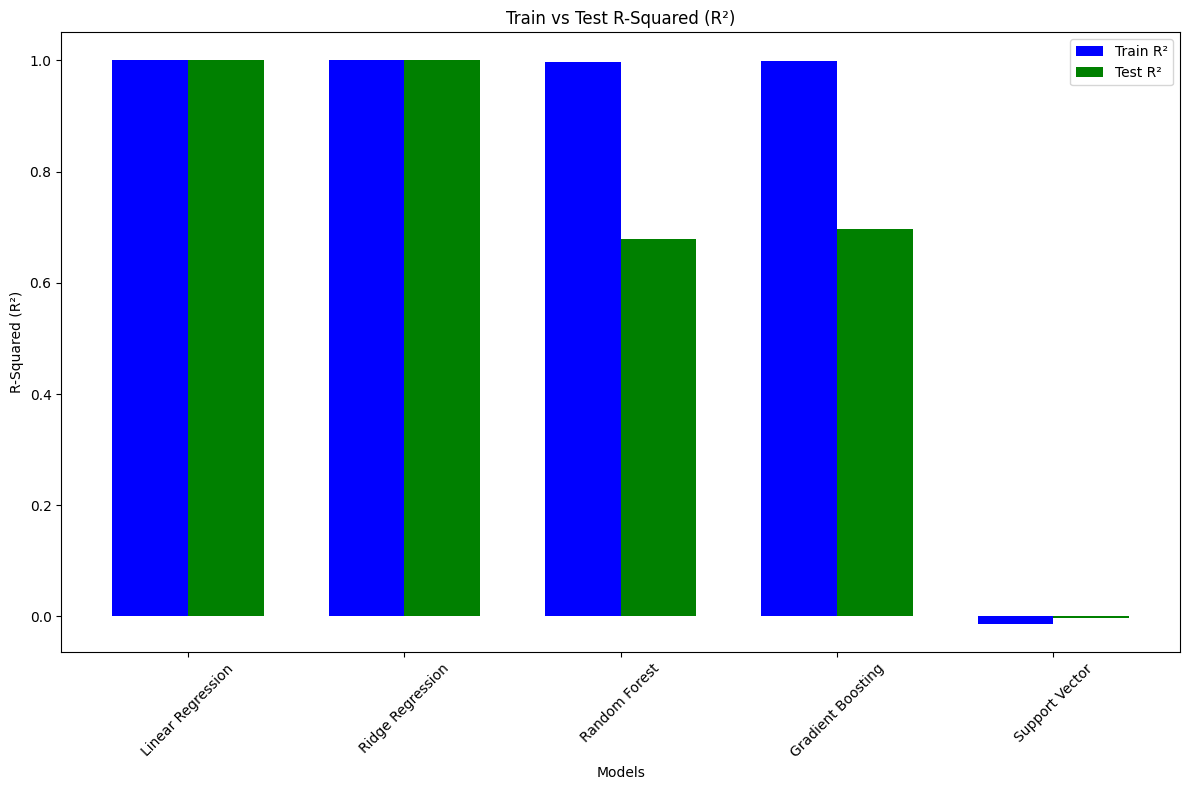

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR()
}

# Dictionary to store evaluation metrics
metrics = {
    'Model': [],
    'Train_MAE': [],
    'Test_MAE': [],
    'Train_MSE': [],
    'Test_MSE': [],
    'Train_R²': [],
    'Test_R²': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store metrics
    metrics['Model'].append(name)
    metrics['Train_MAE'].append(train_mae)
    metrics['Test_MAE'].append(test_mae)
    metrics['Train_MSE'].append(train_mse)
    metrics['Test_MSE'].append(test_mse)
    metrics['Train_R²'].append(train_r2)
    metrics['Test_R²'].append(test_r2)

    # Print the accuracy metrics for each model
    print(f"Model: {name}")
    print(f"Train Mean Absolute Error (MAE): {train_mae}")
    print(f"Test Mean Absolute Error (MAE): {test_mae}")
    print(f"Train Mean Squared Error (MSE): {train_mse}")
    print(f"Test Mean Squared Error (MSE): {test_mse}")
    print(f"Train R-Squared (R²): {train_r2}")
    print(f"Test R-Squared (R²): {test_r2}")
    print("\n")

# Visualization
models = metrics['Model']
train_mae = metrics['Train_MAE']
test_mae = metrics['Test_MAE']
train_mse = metrics['Train_MSE']
test_mse = metrics['Test_MSE']
train_r2 = metrics['Train_R²']
test_r2 = metrics['Test_R²']

x = np.arange(len(models))

# Plot for MAE
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_width = 0.35
ax1.bar(x - bar_width/2, train_mae, bar_width, label='Train MAE', color='b')
ax1.bar(x + bar_width/2, test_mae, bar_width, label='Test MAE', color='g')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Absolute Error (MAE)')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45)
ax1.legend(loc='upper right')
ax1.set_title('Train vs Test Mean Absolute Error (MAE)')

# Plot for MSE
fig, ax2 = plt.subplots(figsize=(12, 8))
ax2.bar(x - bar_width/2, train_mse, bar_width, label='Train MSE', color='b')
ax2.bar(x + bar_width/2, test_mse, bar_width, label='Test MSE', color='g')
ax2.set_xlabel('Models')
ax2.set_ylabel('Mean Squared Error (MSE)')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45)
ax2.legend(loc='upper right')
ax2.set_title('Train vs Test Mean Squared Error (MSE)')

# Plot for R-Squared
fig, ax3 = plt.subplots(figsize=(12, 8))
ax3.bar(x - bar_width/2, train_r2, bar_width, label='Train R²', color='b')
ax3.bar(x + bar_width/2, test_r2, bar_width, label='Test R²', color='g')
ax3.set_xlabel('Models')
ax3.set_ylabel('R-Squared (R²)')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45)
ax3.legend(loc='upper right')
ax3.set_title('Train vs Test R-Squared (R²)')

fig.tight_layout()
plt.show()
